In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('Camden_accidents/Camden_accidents2.csv')
df.dtypes

Datetime                      object
Number                        object
Municipality                  object
Date                          object
Day of Week                   object
Severity                      object
Intersection                  object
Crash Type                     int64
Total Vehicles               float64
Location                      object
Road Horizontal Alignment    float64
Road Grade                   float64
Road Surface Type            float64
Surface Condition            float64
Light Condition              float64
Environment Condition        float64
Road Divided By              float64
Posted Speed                 float64
Month                          int64
dtype: object

In [3]:
df.loc[df.Severity=='F', 'Severity']='I'

In [4]:
df.drop(columns=['Datetime', 'Date', 'Day of Week', 'Location', 'Road Horizontal Alignment', 'Road Grade', 'Road Surface Type',
                'Surface Condition', 'Light Condition', 'Road Divided By', 'Posted Speed', 'Month', 'Environment Condition'], inplace=True)

In [5]:
df.head()

,Number,Municipality,Severity,Intersection,Crash Type,Total Vehicles
0,201704122017-000003,Collingswood Boro,I,I,11,1.0
1,2017040917-000034,Cherry Hill Twp,I,B,13,1.0
2,20170436A160-2017-00002A,Winslow Twp,P,B,11,1.0
3,201704152017-000019,Gloucester Twp,P,I,6,2.0
4,2017040917-000064,Cherry Hill Twp,I,B,1,2.0


In [6]:
df2=pd.read_csv('Camden_accidents/Camden_V3.csv')
df2.head()

,Unnamed: 0,Number,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Vehicle Use_x,V_Age_x,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y,Vehicle Use_y,V_Age_y
0,0,2017040217-036-A,6.0,6.0,2,1.0,1.0,10.0,6.0,6.0,2,1.0,1.0,10.0
1,1,2017040217-067-A,3.0,4.0,4,4.0,1.0,6.0,12.0,12.0,4,1.0,1.0,12.0
2,2,2017040217-161-A,12.0,12.0,2,1.0,1.0,1.0,6.0,3.0,4,8.0,1.0,10.0
3,3,2017040217-194-A,2.0,2.0,3,1.0,1.0,16.0,7.0,17.0,2,31.0,1.0,9.0
4,4,2017040217-280-A,12.0,12.0,4,1.0,2.0,8.0,6.0,6.0,2,5.0,1.0,17.0


In [7]:
df2.drop(columns=['Unnamed: 0', 'Vehicle Use_x', 'V_Age_x', 'Vehicle Use_y', 'V_Age_y'], inplace=True)

In [8]:
df2.head()

,Number,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y
0,2017040217-036-A,6.0,6.0,2,1.0,6.0,6.0,2,1.0
1,2017040217-067-A,3.0,4.0,4,4.0,12.0,12.0,4,1.0
2,2017040217-161-A,12.0,12.0,2,1.0,6.0,3.0,4,8.0
3,2017040217-194-A,2.0,2.0,3,1.0,7.0,17.0,2,31.0
4,2017040217-280-A,12.0,12.0,4,1.0,6.0,6.0,2,5.0


In [9]:
df2.dropna(inplace=True)

In [10]:
df3=df.merge(df2, on='Number')

In [11]:
list=['Crash Type','Total Vehicles', 'Initial Impact Location_x','Principal Damage Location_x', 'Extent of Damage_x', 'Vehicle Type_x',
       'Initial Impact Location_y', 'Principal Damage Location_y','Extent of Damage_y', 'Vehicle Type_y']
for column in list:
    df3[column]=df3[column].astype('str')

In [12]:
df3.columns

Index(['Number', 'Municipality', 'Severity', 'Intersection', 'Crash Type',
       'Total Vehicles', 'Initial Impact Location_x',
       'Principal Damage Location_x', 'Extent of Damage_x', 'Vehicle Type_x',
       'Initial Impact Location_y', 'Principal Damage Location_y',
       'Extent of Damage_y', 'Vehicle Type_y'],
      dtype='object')

In [13]:
df3.Municipality=df3.Municipality.str.rstrip()

In [14]:
df3.Severity[df3.Severity.isin(['I', 'F'])]='1'
df3.Severity[df3.Severity.isin(['P'])]='0'
df3.Severity=df3.Severity.astype(int)

In [15]:
df3.drop(columns=['Number'], inplace=True)
cat_column=['Municipality','Intersection', 'Crash Type','Total Vehicles', 'Initial Impact Location_x',
       'Principal Damage Location_x', 'Extent of Damage_x', 'Vehicle Type_x','Initial Impact Location_y', 'Principal Damage Location_y',
       'Extent of Damage_y', 'Vehicle Type_y']
X=df3.drop('Severity',axis=1)
y=df3.Severity

In [16]:
y.value_counts()

0    31552
1    11097
Name: Severity, dtype: int64

In [17]:
X.columns

Index(['Municipality', 'Intersection', 'Crash Type', 'Total Vehicles',
       'Initial Impact Location_x', 'Principal Damage Location_x',
       'Extent of Damage_x', 'Vehicle Type_x', 'Initial Impact Location_y',
       'Principal Damage Location_y', 'Extent of Damage_y', 'Vehicle Type_y'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
import catboost as cb
train_dataset = cb.Pool(X_train,y_train, cat_features=cat_column)
test_dataset = cb.Pool(X_test,y_test, cat_features=cat_column)

In [20]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy') 
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6],
'l2_leaf_reg': [1, 3],
'iterations': [50]}
model.grid_search(grid,train_dataset) 
model.get_params()


bestTest = 0.7799363591
bestIteration = 44

0:	loss: 0.7799364	best: 0.7799364 (0)	total: 2.01s	remaining: 14.1s

bestTest = 0.7839557863
bestIteration = 49

1:	loss: 0.7839558	best: 0.7839558 (1)	total: 3.62s	remaining: 10.9s

bestTest = 0.7799363591
bestIteration = 47

2:	loss: 0.7799364	best: 0.7839558 (1)	total: 5.19s	remaining: 8.64s

bestTest = 0.7846256908
bestIteration = 48

3:	loss: 0.7846257	best: 0.7846257 (3)	total: 6.83s	remaining: 6.83s

bestTest = 0.7799363591
bestIteration = 49

4:	loss: 0.7799364	best: 0.7846257 (3)	total: 8.74s	remaining: 5.25s

bestTest = 0.7868028806
bestIteration = 42

5:	loss: 0.7868029	best: 0.7868029 (5)	total: 11.1s	remaining: 3.7s

bestTest = 0.7789315023
bestIteration = 39

6:	loss: 0.7789315	best: 0.7868029 (5)	total: 13s	remaining: 1.85s

bestTest = 0.7864679283
bestIteration = 46

7:	loss: 0.7864679	best: 0.7868029 (5)	total: 15s	remaining: 0us
Estimating final quality...


{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 1,
 'iterations': 50,
 'learning_rate': 0.1}

In [21]:
from sklearn.metrics import classification_report 
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      9365
           1       0.73      0.34      0.46      3430

    accuracy                           0.79     12795
   macro avg       0.76      0.65      0.67     12795
weighted avg       0.78      0.79      0.76     12795



In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[8925  440]
 [2261 1169]]


Text(0.5, 1.0, 'Confusion Matrix of Catboost Model 4')

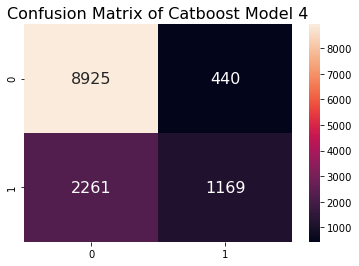

In [23]:
ax=sns.heatmap(confusion_matrix(y_test, pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Catboost Model 4",fontdict= { 'fontsize': 16} )

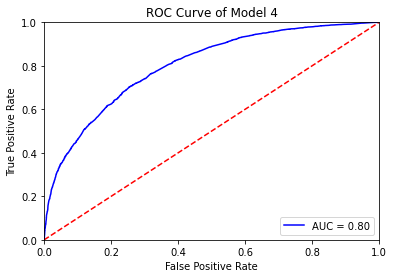

In [24]:
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC Curve of Model 4')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

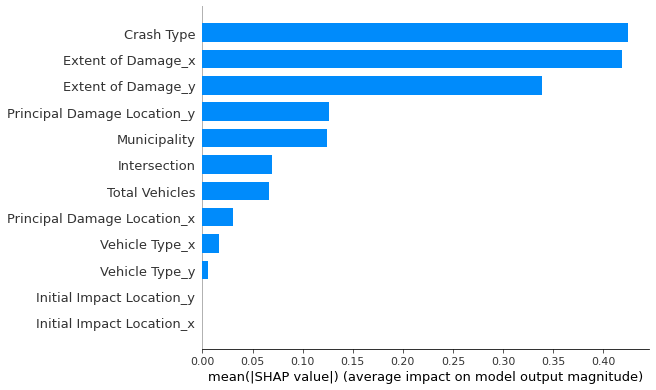

In [25]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [26]:
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
y_train.value_counts()

0    22187
1     7667
Name: Severity, dtype: int64

In [28]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (44374, 178)
After OverSampling, the shape of train_y: (44374,) 

After OverSampling, counts of label '1': 22187
After OverSampling, counts of label '0': 22187


In [29]:
train_dataset = cb.Pool(X_train_res,y_train_res)
test_dataset = cb.Pool(X_test,y_test)

In [30]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy') 
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6],
'l2_leaf_reg': [1, 3],
'iterations': [50]}
model.grid_search(grid,train_dataset) 
model.get_params()


bestTest = 0.7383661972
bestIteration = 49

0:	loss: 0.7383662	best: 0.7383662 (0)	total: 912ms	remaining: 6.38s

bestTest = 0.7896338028
bestIteration = 49

1:	loss: 0.7896338	best: 0.7896338 (1)	total: 1.69s	remaining: 5.08s

bestTest = 0.7383661972
bestIteration = 47

2:	loss: 0.7383662	best: 0.7896338 (1)	total: 2.46s	remaining: 4.11s

bestTest = 0.7861408451
bestIteration = 48

3:	loss: 0.7861408	best: 0.7896338 (1)	total: 3.21s	remaining: 3.21s

bestTest = 0.76
bestIteration = 49

4:	loss: 0.7600000	best: 0.7896338 (1)	total: 4.52s	remaining: 2.71s

bestTest = 0.7954929577
bestIteration = 48

5:	loss: 0.7954930	best: 0.7954930 (5)	total: 5.78s	remaining: 1.93s

bestTest = 0.7513239437
bestIteration = 49

6:	loss: 0.7513239	best: 0.7954930 (5)	total: 6.96s	remaining: 994ms

bestTest = 0.7961690141
bestIteration = 48

7:	loss: 0.7961690	best: 0.7961690 (7)	total: 8.43s	remaining: 0us
Estimating final quality...


{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 3,
 'iterations': 50,
 'learning_rate': 0.1}

In [31]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      9365
           1       0.56      0.57      0.57      3430

    accuracy                           0.76     12795
   macro avg       0.70      0.70      0.70     12795
weighted avg       0.77      0.76      0.77     12795



Text(0.5, 1.0, 'Confusion Matrix of Catboost Model 5')

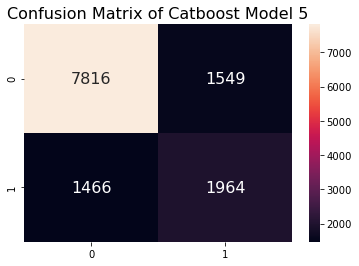

In [32]:
ax=sns.heatmap(confusion_matrix(y_test, pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Catboost Model 5",fontdict= { 'fontsize': 16} )

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_res, y_train_res)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
print(confusion_matrix(y_test, y_pred))

[[7990 1375]
 [1744 1686]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      9365
           1       0.55      0.49      0.52      3430

    accuracy                           0.76     12795
   macro avg       0.69      0.67      0.68     12795
weighted avg       0.75      0.76      0.75     12795



In [35]:
train_dataset = cb.Pool(X_train_res,y_train_res)
test_dataset = cb.Pool(X_test,y_test)

In [36]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy') 
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6],
'l2_leaf_reg': [1, 3],
'iterations': [50]}
model.grid_search(grid,train_dataset) 
model.get_params()


bestTest = 0.7383661972
bestIteration = 49

0:	loss: 0.7383662	best: 0.7383662 (0)	total: 1.36s	remaining: 9.49s

bestTest = 0.7896338028
bestIteration = 49

1:	loss: 0.7896338	best: 0.7896338 (1)	total: 3.18s	remaining: 9.53s

bestTest = 0.7383661972
bestIteration = 47

2:	loss: 0.7383662	best: 0.7896338 (1)	total: 4.58s	remaining: 7.63s

bestTest = 0.7861408451
bestIteration = 48

3:	loss: 0.7861408	best: 0.7896338 (1)	total: 5.78s	remaining: 5.78s

bestTest = 0.76
bestIteration = 49

4:	loss: 0.7600000	best: 0.7896338 (1)	total: 7.34s	remaining: 4.41s

bestTest = 0.7954929577
bestIteration = 48

5:	loss: 0.7954930	best: 0.7954930 (5)	total: 8.74s	remaining: 2.91s

bestTest = 0.7513239437
bestIteration = 49

6:	loss: 0.7513239	best: 0.7954930 (5)	total: 10.3s	remaining: 1.47s

bestTest = 0.7961690141
bestIteration = 48

7:	loss: 0.7961690	best: 0.7961690 (7)	total: 11.9s	remaining: 0us
Estimating final quality...


{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 3,
 'iterations': 50,
 'learning_rate': 0.1}

In [37]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      9365
           1       0.56      0.57      0.57      3430

    accuracy                           0.76     12795
   macro avg       0.70      0.70      0.70     12795
weighted avg       0.77      0.76      0.77     12795



In [38]:
print(confusion_matrix(y_test, pred))

[[7816 1549]
 [1466 1964]]


In [39]:
smote_on_1 = 40000

In [40]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (44374, 178)
After OverSampling, the shape of train_y: (44374,) 

After OverSampling, counts of label '1': 22187
After OverSampling, counts of label '0': 22187


In [41]:
train_dataset = cb.Pool(X_train_res,y_train_res)
test_dataset = cb.Pool(X_test,y_test)
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy') 
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6],
'l2_leaf_reg': [1, 3],
'iterations': [50]}
model.grid_search(grid,train_dataset) 
model.get_params()



bestTest = 0.7383661972
bestIteration = 49

0:	loss: 0.7383662	best: 0.7383662 (0)	total: 1.02s	remaining: 7.12s

bestTest = 0.7896338028
bestIteration = 49

1:	loss: 0.7896338	best: 0.7896338 (1)	total: 2.04s	remaining: 6.11s

bestTest = 0.7383661972
bestIteration = 47

2:	loss: 0.7383662	best: 0.7896338 (1)	total: 3.09s	remaining: 5.15s

bestTest = 0.7861408451
bestIteration = 48

3:	loss: 0.7861408	best: 0.7896338 (1)	total: 4.17s	remaining: 4.17s

bestTest = 0.76
bestIteration = 49

4:	loss: 0.7600000	best: 0.7896338 (1)	total: 6.42s	remaining: 3.85s

bestTest = 0.7954929577
bestIteration = 48

5:	loss: 0.7954930	best: 0.7954930 (5)	total: 8.44s	remaining: 2.81s

bestTest = 0.7513239437
bestIteration = 49

6:	loss: 0.7513239	best: 0.7954930 (5)	total: 10.1s	remaining: 1.45s

bestTest = 0.7961690141
bestIteration = 48

7:	loss: 0.7961690	best: 0.7961690 (7)	total: 12.1s	remaining: 0us
Estimating final quality...


{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 3,
 'iterations': 50,
 'learning_rate': 0.1}

In [42]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      9365
           1       0.56      0.57      0.57      3430

    accuracy                           0.76     12795
   macro avg       0.70      0.70      0.70     12795
weighted avg       0.77      0.76      0.77     12795



In [43]:
print(confusion_matrix(y_test, pred))

[[7816 1549]
 [1466 1964]]


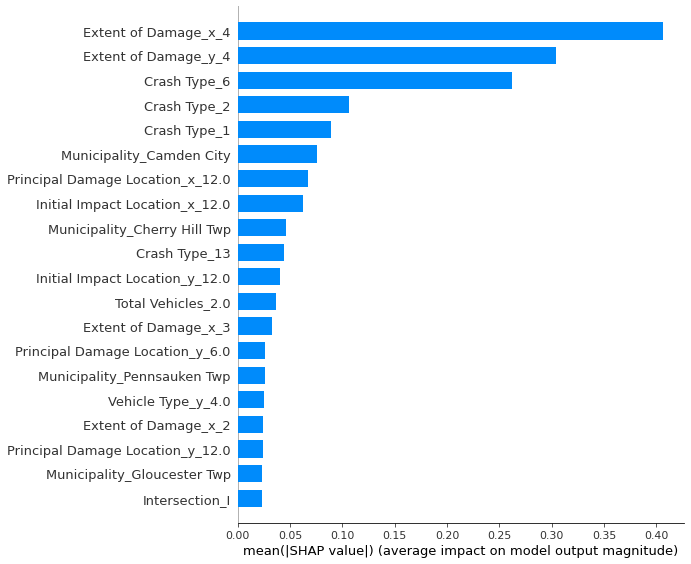

In [44]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")